4.67.1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.prepare_data import prepare_split, augment_balance

In [2]:
# 2. Load metadata
balanced_df = pd.read_csv("data/raw_ham/ham10000_metadata_2025-08-30.csv")
print("Columns:", balanced_df.columns)
print(balanced_df.head())
print(balanced_df['diagnosis_3'].unique())
print(balanced_df['diagnosis_3'].value_counts())

Columns: Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'anatom_site_special', 'concomitant_biopsy',
       'diagnosis_1', 'diagnosis_2', 'diagnosis_3', 'diagnosis_confirm_type',
       'image_manipulation', 'image_type', 'lesion_id', 'melanocytic', 'sex'],
      dtype='object')
        isic_id                                        attribution  \
0  ISIC_0024306  ViDIR Group, Department of Dermatology, Medica...   
1  ISIC_0024307  ViDIR Group, Department of Dermatology, Medica...   
2  ISIC_0024308  ViDIR Group, Department of Dermatology, Medica...   
3  ISIC_0024309  ViDIR Group, Department of Dermatology, Medica...   
4  ISIC_0024310  ViDIR Group, Department of Dermatology, Medica...   

  copyright_license  age_approx anatom_site_general anatom_site_special  \
0          CC-BY-NC        45.0                 NaN                 NaN   
1          CC-BY-NC        50.0     lower extremity                 NaN   
2          CC-BY-NC    

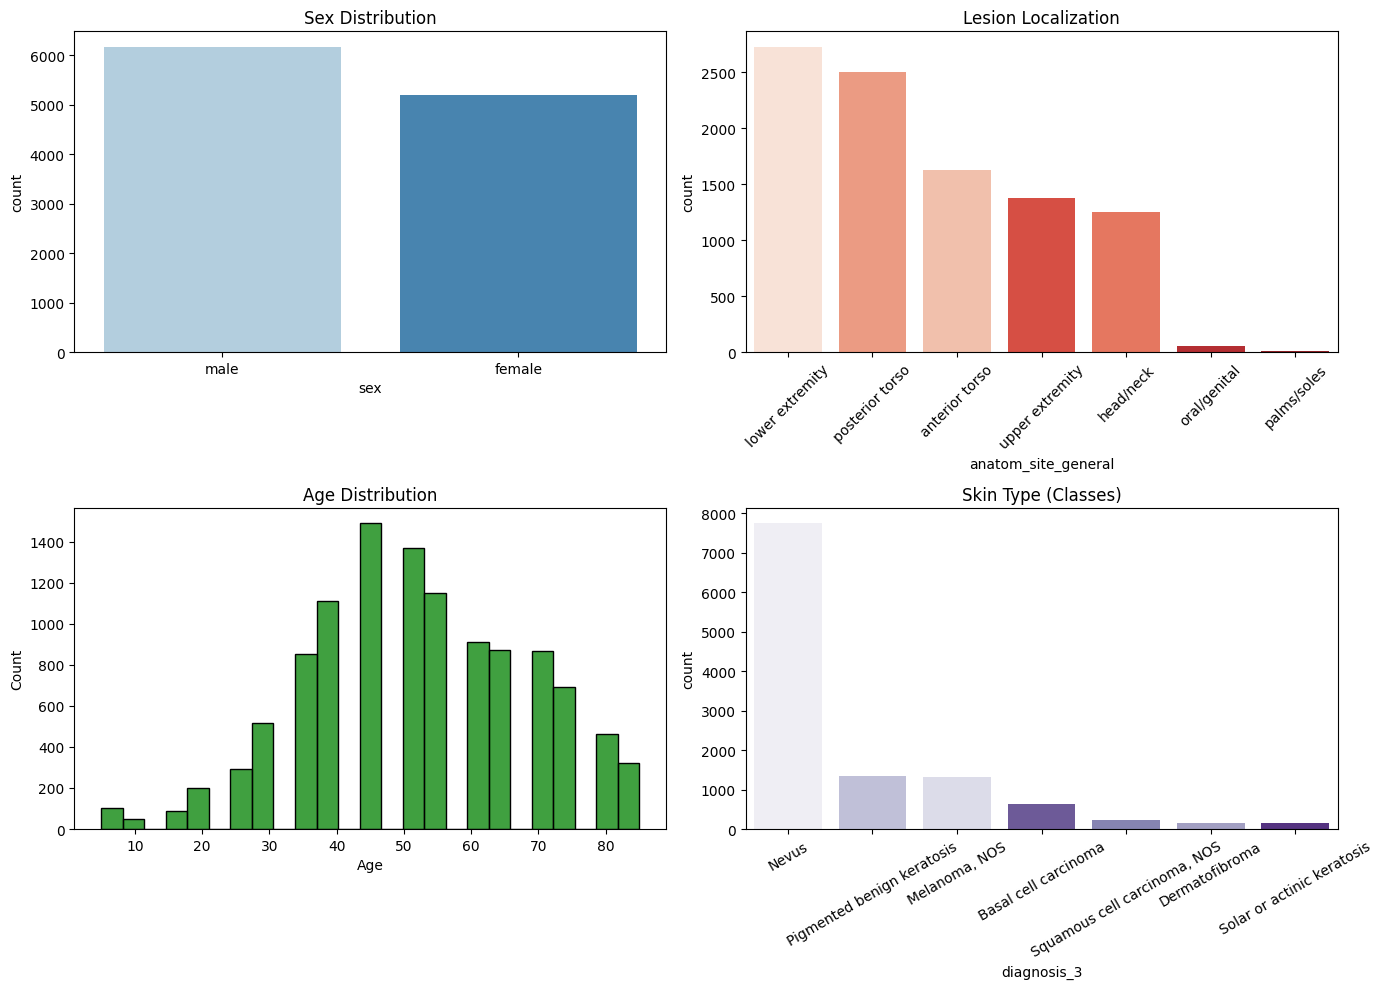

In [ ]:
# 3. Raw Distribution Plots
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.countplot(data=balanced_df, x="sex", ax=axs[0,0], hue="sex", legend=False, palette="Blues")
axs[0,0].set_title("Sex Distribution")

sns.countplot(data=balanced_df, x="anatom_site_general",
              order=balanced_df["anatom_site_general"].value_counts().index,
              ax=axs[0,1], hue="anatom_site_general", legend=False, palette="Reds")
axs[0,1].set_title("Lesion Localization")
axs[0,1].tick_params(axis='x', rotation=45)

sns.histplot(balanced_df["age_approx"].dropna(), bins=25, ax=axs[1,0], color="green")
axs[1,0].set_title("Age Distribution")
axs[1,0].set_xlabel("Age")

sns.countplot(data=balanced_df, x="diagnosis_3",
              order=balanced_df["diagnosis_3"].value_counts().index,
              ax=axs[1,1], hue="diagnosis_3", legend=False, palette="Purples")
axs[1,1].set_title("Skin Type (Classes)")
axs[1,1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig("outputs/plots/raw_distribution.png")
plt.show()

In [3]:
# 4. Prepare train/val/test split (resized to 28x28)
train_df, val_df, test_df = prepare_split()
print("Train:", len(train_df), "Val:", len(val_df), "Test:", len(test_df))

Train: 9232 Val: 1154 Test: 1154


In [4]:
# 5. Augment + Balance
balanced_df = augment_balance(train_df)

Augmenting Squamous cell carcinoma, NOS: 100%|██████████| 6007/6007 [00:27<00:00, 219.70it/s]


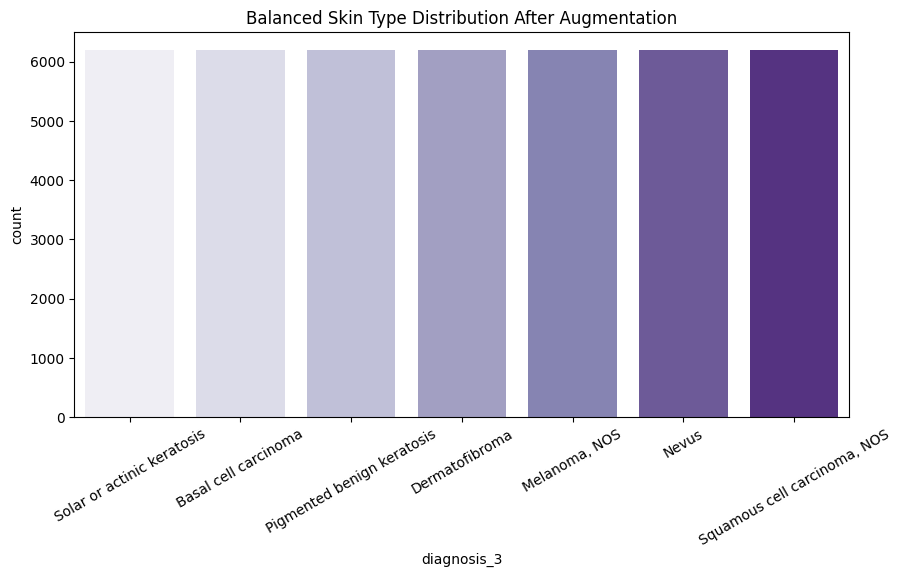

In [7]:
# 6. Balanced Distribution Plot
plt.figure(figsize=(10,5))
sns.countplot(data=balanced_df, x="diagnosis_3", order=balanced_df["diagnosis_3"].value_counts().index, hue="diagnosis_3", legend=False, palette="Purples")
plt.title("Balanced Skin Type Distribution After Augmentation")
plt.xticks(rotation=30)
plt.savefig("outputs/plots/balanced_skin_type.png")
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_3296\2578926147.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  balanced_df=pd.read_csv("data/dataset/train_balanced.csv")


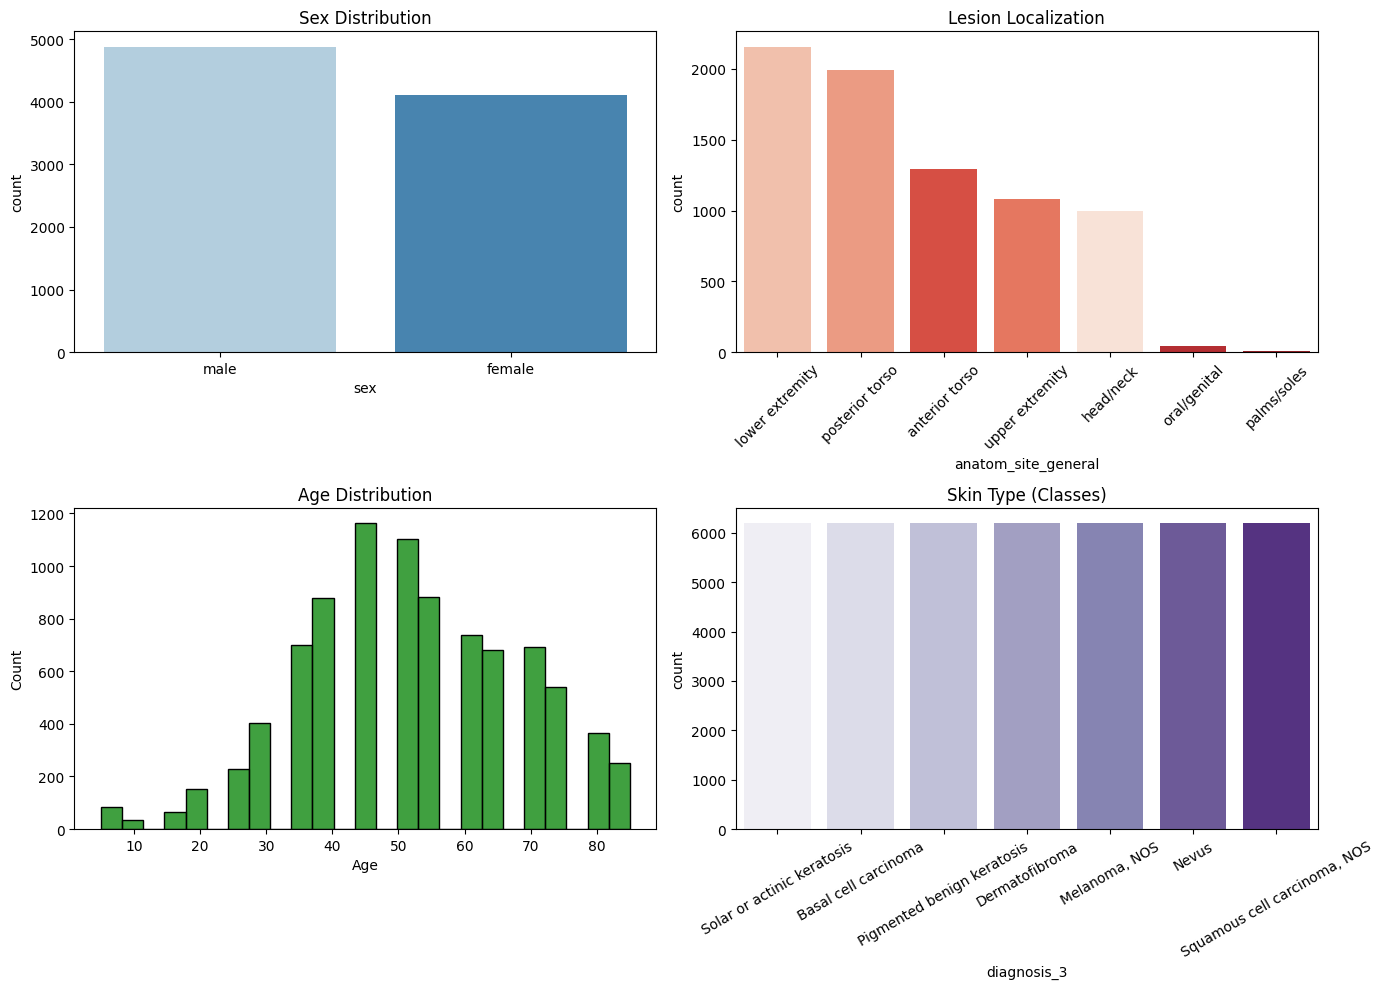

In [3]:
balanced_df=pd.read_csv("data/dataset/train_balanced.csv")
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.countplot(data=balanced_df, x="sex", ax=axs[0,0], hue="sex", legend=False, palette="Blues")
axs[0,0].set_title("Sex Distribution")

sns.countplot(data=balanced_df, x="anatom_site_general",
              order=balanced_df["anatom_site_general"].value_counts().index,
              ax=axs[0,1], hue="anatom_site_general", legend=False, palette="Reds")
axs[0,1].set_title("Lesion Localization")
axs[0,1].tick_params(axis='x', rotation=45)

sns.histplot(balanced_df["age_approx"].dropna(), bins=25, ax=axs[1,0], color="green")
axs[1,0].set_title("Age Distribution")
axs[1,0].set_xlabel("Age")

sns.countplot(data=balanced_df, x="diagnosis_3",
              order=balanced_df["diagnosis_3"].value_counts().index,
              ax=axs[1,1], hue="diagnosis_3", legend=False, palette="Purples")
axs[1,1].set_title("Skin Type (Classes)")
axs[1,1].tick_params(axis='x', rotation=30)

plt.tight_layout()
# plt.savefig("outputs/plots/raw_distribution.png")
plt.show()